# Camera Test

## Libraries

In [2]:
from picamera.array import PiYUVArray, PiRGBArray
from picamera import PiCamera

from scipy.signal import find_peaks, butter, filtfilt

import time
import matplotlib.pyplot as plt
import skimage as ski

from raceon import Car

## Initiate camera

In [3]:
res = (640, 480)
camera = PiCamera()

# Check the link below for the combinations between mode and resolution
# https://picamera.readthedocs.io/en/release-1.13/fov.html#sensor-modes
camera.sensor_mode = 7
camera.resolution = res
camera.framerate = 30

# Initialize the buffer and start capturing
rawCapture = PiRGBArray(camera, size=res)
stream = camera.capture_continuous(rawCapture, format="rgb", use_video_port=True)

## Capture a frame

In [4]:
rawCapture.truncate(0)
frame = next(stream)

## Show the image

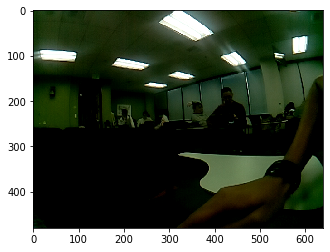

In [5]:
plt.imshow(frame.array)

## Release Resources

In [6]:
stream.close()
rawCapture.close()
camera.close()

# Setup Motor and Servo

Before continuing have the servo outside the car with the arm disconnected.

In [7]:
# set required variables for motor and servo
MOTOR_PIN = 0
SERVO_PIN = 1
SERVO_LEFT = 2000
SERVO_RIGHT = 1000
SERVO_MID = 1500

In [8]:
# make a new instance of Car
car = Car(MOTOR_PIN, SERVO_PIN, SERVO_LEFT, SERVO_MID, SERVO_RIGHT)

In [9]:
# enable the car (enable PWM pins)
car.enable()

Wait 3 seconds for the ESC to stop beeping.

## Motor Test

Set car speed between 0 (stop) and 1000 (max).

In [10]:
car.speed(200)

You can also call brake to stop the car.

In [11]:
car.brake()

## Servo Test

Steer the car left or right.

-1000 is max left, 1000 is max right, and 0 is middle.

In [11]:
# set the servo to middle
car.steer(0)

Now while the servo is in the middle position, install the servo arm so that it is pointing up and is perpendicular to the base of the car.

At this point you can install the servo in the car and make sure that the wheels are pointing forward.

In [12]:
# set servo to steer left
car.steer(-900)

In [13]:
# set servo to steer right
car.steer(900)

Make sure that the wheels go full left and full right.

In [14]:
# set the servo to middle
car.steer(0)

Calling disable stops the car and disables all PWM pins.

In [15]:
car.disable()